<a href="https://colab.research.google.com/github/Jtouloupis/CovidTweetsAnalyser/blob/main/TweetAnalyserV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import re
import string
import re
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import gensim
from sklearn.model_selection import train_test_split
import spacy
import pickle
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import random
print('Done')


Done


In [ ]:
data = pd.read_csv('/content/tweets.csv',header=0)


In [ ]:
# Shuffle the rows using the sample function
df_shuffled = data.sample(frac=1)

# Reset the index of the shuffled DataFrame
data = df_shuffled.reset_index(drop=True)

In [ ]:
data.describe()

,Type
count,2507.000000
mean,0.991623
std,0.848176
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [ ]:
#Is there any other different value than neutral, negative and positive?
data['Type'].unique()

array([0, 1, 2])

In [ ]:
#How's distributed the dataset? Is it biased?
data.groupby('Type').nunique()

,Tweets,Url
Type,,
0,901,897
1,697,692
2,889,240


In [ ]:
#Let's keep only the columns that we're going to use
data = data[['Tweets','Type']]
data.head()
  

,Tweets,Type
0,"PSA: if you get covid, make sure you get a PCR...",0
1,"This is what they want. They want you lost, co...",1
2,Spent the afternoon at Heath Hospital Cardiff ...,1
3,Wanting HC workers to wear masks & wanting bet...,0
4,Whats going on?#KeepMasksInHealthCare https://...,0


In [ ]:
#Is there any null value?
data["Tweets"].isnull().sum()

0

In [ ]:
#Let's fill the only null value.
data["Tweets"].fillna("No content", inplace = True)

In [ ]:
print(data)

                                                 Tweets  Type
0     PSA: if you get covid, make sure you get a PCR...     0
1     This is what they want. They want you lost, co...     1
2     Spent the afternoon at Heath Hospital Cardiff ...     1
3     Wanting HC workers to wear masks & wanting bet...     0
4     Whats going on?#KeepMasksInHealthCare https://...     0
...                                                 ...   ...
2502  Almost infinite line in front of supermarket d...     2
2503  @SKGandhiMD Thank you.\n\nTo think of anyone i...     0
2504  I have to wait almost 3 weeks for my food deli...     2
2505  Such a deadly virus that high risk patients on...     1
2506  Yet more evidence of persistent damage to majo...     0

[2507 rows x 2 columns]


In [ ]:
def depure_data(data):
    
    #Removing URLs with a regular expression
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    data = url_pattern.sub(r'', data)

    # Remove Emails
    data = re.sub('\S*@\S*\s?', '', data)

    # Remove new line characters
    data = re.sub('\s+', ' ', data)

    # Remove distracting single quotes
    data = re.sub("\'", "", data)
        
    return data

In [ ]:
temp = []
#Splitting pd.Series to list
data_to_list = data['Tweets'].values.tolist()
for i in range(len(data_to_list)):
    temp.append(depure_data(data_to_list[i]))
list(temp[:10])

['PSA: if you get covid, make sure you get a PCR test! I understand you might have to pay for it now, which REALLY sucks. However, if you end up with long covid and dont have a PCR test, you might find yourself restricted from the few resources available, along with st',
 'This is what they want. They want you lost, confused, overwhelmed and not knowing who or what to believe. Stay the course. Stay strong. Stay alert. Stay safe. Stay awake. #CovidIsAHoax #CovidIsALie #Plandemic #Scamdemic #OperationLockstep #Event201 #Agenda21 #MedicalTyranny #NWO',
 'Spent the afternoon at Heath Hospital Cardiff A&E. Still about 90% people wearing mask. Lying bugger on this form, didnt provide a mask, probably thought it wasnt worthwhile after asking about my jabs #scamdem',
 'Wanting HC workers to wear masks & wanting better air filtration while seeking healthcare isnt out of an "unfounded fear" that we may get Covid. My dear friend, Carissa, contracted Covid while in the hospital for other treatment

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        

data_words = list(sent_to_words(temp))

print(data_words[:5])

[['psa', 'if', 'you', 'get', 'covid', 'make', 'sure', 'you', 'get', 'pcr', 'test', 'understand', 'you', 'might', 'have', 'to', 'pay', 'for', 'it', 'now', 'which', 'really', 'sucks', 'however', 'if', 'you', 'end', 'up', 'with', 'long', 'covid', 'and', 'dont', 'have', 'pcr', 'test', 'you', 'might', 'find', 'yourself', 'restricted', 'from', 'the', 'few', 'resources', 'available', 'along', 'with', 'st'], ['this', 'is', 'what', 'they', 'want', 'they', 'want', 'you', 'lost', 'confused', 'overwhelmed', 'and', 'not', 'knowing', 'who', 'or', 'what', 'to', 'believe', 'stay', 'the', 'course', 'stay', 'strong', 'stay', 'alert', 'stay', 'safe', 'stay', 'awake', 'covidisahoax', 'covidisalie', 'plandemic', 'scamdemic', 'event', 'agenda', 'medicaltyranny', 'nwo'], ['spent', 'the', 'afternoon', 'at', 'heath', 'hospital', 'cardiff', 'still', 'about', 'people', 'wearing', 'mask', 'lying', 'bugger', 'on', 'this', 'form', 'didnt', 'provide', 'mask', 'probably', 'thought', 'it', 'wasnt', 'worthwhile', 'afte

In [ ]:
len(data_words)


2507

In [ ]:
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

In [ ]:
data2 = []
for i in range(len(data_words)):
    data2.append(detokenize(data_words[i]))
print(data2[:5])

['psa if you get covid make sure you get pcr test understand you might have to pay for it now which really sucks however if you end up with long covid and dont have pcr test you might find yourself restricted from the few resources available along with st', 'this is what they want they want you lost confused overwhelmed and not knowing who or what to believe stay the course stay strong stay alert stay safe stay awake covidisahoax covidisalie plandemic scamdemic event agenda medicaltyranny nwo', 'spent the afternoon at heath hospital cardiff still about people wearing mask lying bugger on this form didnt provide mask probably thought it wasnt worthwhile after asking about my jabs scamdem', 'wanting hc workers to wear masks wanting better air filtration while seeking healthcare isnt out of an unfounded fear that we may get covid my dear friend carissa contracted covid while in the hospital for other treatments nov died she was bringbackmasks', 'whats going on']


In [ ]:
#data2['Type'].unique()

In [ ]:
labels = np.array(data['Type'])
labels = tf.keras.utils.to_categorical(labels, 3, dtype="float32")

In [ ]:
print(labels)


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [ ]:
data2 = np.array(data2)


In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint

max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data2)
sequences = tokenizer.texts_to_sequences(data2)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)


[[   0    0    0 ... 1450   17  441]
 [   0    0    0 ...  281 2053 1256]
 [   0    0    0 ...   28  262 2692]
 ...
 [   0    0    0 ...  219   15 2204]
 [   0    0    0 ... 1277   23  172]
 [   0    0    0 ...   24   65 3991]]


In [ ]:
print(labels)


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [ ]:
##from keras.layers import Embedding
#embedding_layer = Embedding(1000, 64)

In [ ]:
#Splitting the data
#X_train, X_test, y_train, y_test = train_test_split(tweets,labels, random_state=0)
X_train = tweets[0:2000]
y_train = labels[0:2000]
X_test =  tweets[2000:2508]
y_test = labels[2000:2508]


print (len(X_train),len(X_test),len(y_train),len(y_test))

2000 507 2000 507


In [ ]:
model2 = Sequential()
#model2.add(layers.Embedding(max_words, 40, input_length=max_len))
model2.add(layers.Embedding(5000, 32, input_length=200))
model2.add(layers.Bidirectional(layers.LSTM(20,dropout=0.6)))
model2.add(layers.Dense(3,activation='softmax'))
model2.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint2 = ModelCheckpoint("best_model2.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=25,validation_data=(X_test, y_test),callbacks=[checkpoint2])

Epoch 1/25
63/63 [==============================] - ETA: 0s - loss: 1.0794 - accuracy: 0.4430
Epoch 1: val_accuracy improved from -inf to 0.53846, saving model to best_model2.hdf5
63/63 [==============================] - 14s 153ms/step - loss: 1.0794 - accuracy: 0.4430 - val_loss: 1.0519 - val_accuracy: 0.5385
Epoch 2/25
63/63 [==============================] - ETA: 0s - loss: 0.9735 - accuracy: 0.5580
Epoch 2: val_accuracy improved from 0.53846 to 0.62919, saving model to best_model2.hdf5
63/63 [==============================] - 7s 110ms/step - loss: 0.9735 - accuracy: 0.5580 - val_loss: 0.8838 - val_accuracy: 0.6292
Epoch 3/25
63/63 [==============================] - ETA: 0s - loss: 0.7935 - accuracy: 0.6555
Epoch 3: val_accuracy improved from 0.62919 to 0.69231, saving model to best_model2.hdf5
63/63 [==============================] - 5s 74ms/step - loss: 0.7935 - accuracy: 0.6555 - val_loss: 0.7327 - val_accuracy: 0.6923
Epoch 4/25
63/63 [==============================] - ETA: 0s -

In [ ]:
predictions = model2.predict(X_test)


16/16 [==============================] - 1s 9ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test.argmax(axis=1), np.around(predictions, decimals=0).argmax(axis=1))

<Axes: >

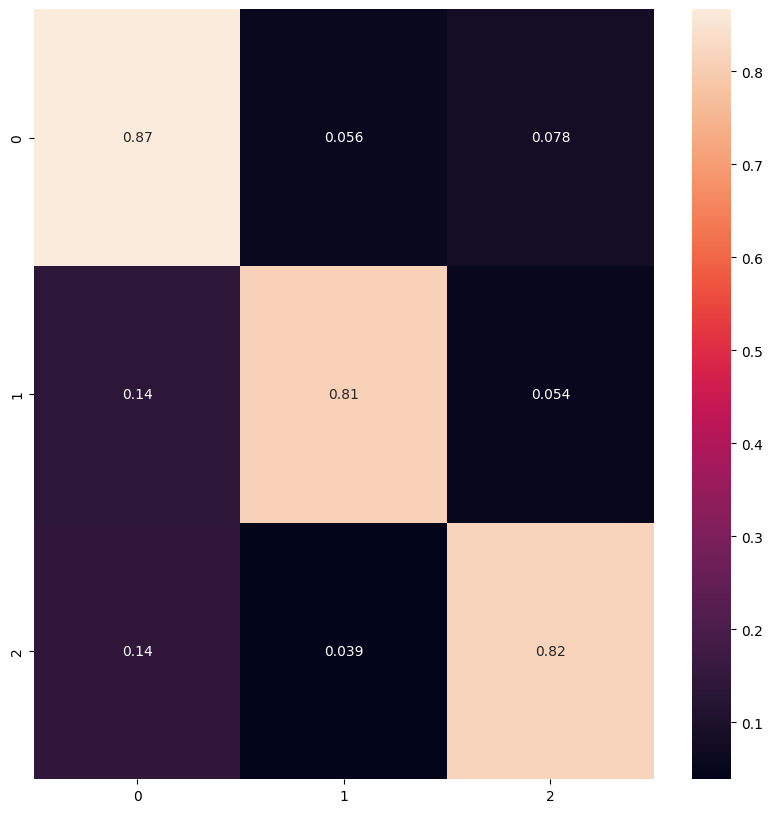

In [ ]:
import seaborn as sns
conf_matrix = pd.DataFrame(matrix, index = ['0','1','2'],columns = ['0','1','2'])
#Normalizing
conf_matrix = conf_matrix.astype('int') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 10})

In [ ]:
sentiment = ['0','1','2']


In [ ]:
sequence = tokenizer.texts_to_sequences(["5000 are the new covid cases in greece for the week"])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 24ms/step


'2'

In [ ]:
sequence = tokenizer.texts_to_sequences(["vaccine injuries are happening"])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 22ms/step


'1'

In [ ]:
sequence = tokenizer.texts_to_sequences(["injuries are happening but they are not many in comparison with the long covid cases"])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 23ms/step


'0'

In [ ]:
sequence = tokenizer.texts_to_sequences(["20 vaccine injuries and 1000 long covid patients were recorded for this month"])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 26ms/step


'2'

In [ ]:
sequence = tokenizer.texts_to_sequences(['the covid vaccine protected my two sons'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 26ms/step


'0'

In [ ]:
sequence = tokenizer.texts_to_sequences(["just wear a mask an protect the others"])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 24ms/step


'0'

In [ ]:
sequence = tokenizer.texts_to_sequences(["covid is a created virus that is going to controll us"])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 23ms/step


'1'

In [ ]:
sequence = tokenizer.texts_to_sequences(["covid-19 is a bio weapon leaked from a lab"])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 24ms/step


'1'

In [ ]:
sequence = tokenizer.texts_to_sequences(["Suzanne Gazda MD is a neurologist with 4,000 patients. The vast majority were advised to take the vaccine by other doctors. The vast majority of those got significantly worse after they took the COVID vaccine."])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 148ms/step


'1'

In [ ]:
sequence = tokenizer.texts_to_sequences(["covid-19 does not exist"])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 22ms/step


'1'

In [ ]:

sequence = tokenizer.texts_to_sequences(["54 year old Canadian doctor Dr.Annie Rousseau died on April 21, 2023She was an internist & gastroenterologist in Saint-Jean-sur-Richelieu, Quebec.Fully COVID-19 mRNA vaccinated. Dead at 54.@CMA_Docsneeds to be sued by families of all dead MDs"])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 24ms/step


'1'

In [ ]:
sequence = tokenizer.texts_to_sequences(["My daughter has 3 more days of being a high school senior, 3 more days in an N99 in open air classrooms. Then shes on to online courses after graduation ceremony in June…shes 15 AND she wrote a book and watched family disappear due to her covid stance. Round of applause is ok."])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 63ms/step


'2'

In [ ]:
sequence = tokenizer.texts_to_sequences(["On 21 February 2021 I noted in an affidavit that the World Health Organisation had 102,000 reports of COVID vaccine adverse drug reactions on its http://vigiaccess.org database. This week the number passed the 5,000,000 mark.  Let me repeat this because it is hard to believe. According to WHO’s own data, more than 5,000,000 people are suspected to have been harmed by the COVID vaccines. The exact number today is 5,026,245 people, including tens of thousands of deaths."])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]
#wrong

1/1 [==============================] - 0s 128ms/step


'0'

In [ ]:
sequence = tokenizer.texts_to_sequences(["My gawd 😭 I can’t believe they did this to people at funerals. NEVER FORGET how people were treating during “covid”Just found this post and it so heartbreaking"])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 45ms/step


'2'

In [ ]:
sequence = tokenizer.texts_to_sequences(["@RobertKennedyJrcalls out Bill Gates and the World Economic Forum saying they are exploiting climate change like they exploited Covid"])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]   #wrong?

1/1 [==============================] - 0s 77ms/step


'1'

In [ ]:
sequence = tokenizer.texts_to_sequences(["Excuse me, Sir, but you've been in favor of lockdowns, injecting children with an experimental gene therapy, silencing critics, and mask mandates. In addition, you have pronouns in your bio and called the Covid vaccines 'safe and effective'.You should keep your mouth shut!"])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 40ms/step


'1'

In [ ]:
sequence = tokenizer.texts_to_sequences(["The Bible has been manipulated by the dark side for a long time. The real bible was found under the Vatican. This guy has many different bibles and shows you the difference in regards to the Mark of the Beast ! COVID SHOT"])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 39ms/step


'1'

In [ ]:
sequence = tokenizer.texts_to_sequences(["Getting Covid is not a personal failing Getting long Covid is not a personal failing Being high risk for Covid is not a personal failing People have about as much control over this as their eye colour.So stop treating all of the above like it’s their fault"])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 22ms/step


'0'

In [ ]:
sequence = tokenizer.texts_to_sequences(["It's alright.The pandemic is over.People stopped dying of Covid when we stopped testing for Covid.And now they just die 'deaths not involving Covid' during waves of Covid."])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]
#wrong

1/1 [==============================] - 0s 36ms/step


'2'

In [ ]:
sequence = tokenizer.texts_to_sequences(["Our Covid data project Is over, but the need for timely data is not.The John Hopkins Coronavirus Resource Centre."])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 36ms/step


'2'

In [ ]:
sequence = tokenizer.texts_to_sequences(["Our Covid data project Is over, but the need for timely data is not.The John Hopkins Coronavirus Resource Centre."])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]